<a href="https://colab.research.google.com/github/Procuste34/Cours-Reseaux-de-Neurones/blob/main/viz_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [35]:
m=500
X = np.random.random((2, m))
#Y = ((X[0, :] - X[1, :] - 0.2) > 0).reshape(1, m).astype(np.float64)
Y_classes = (np.sqrt((X[0, :] - 0.5)**2 + (X[1, :] - 0.5)**2) > 0.4).reshape(1, m).astype(np.float64)
Y = (np.sqrt((X[0, :] - 0.5)**2 + (X[1, :] - 0.5)**2) > 0.4).reshape(1, m).astype(np.float64)
#Y = ((X[0, :] > 0.5) * (X[1, :] > 0.5)).reshape(1, m).astype(np.float64) #COOL
#Y = ((X[0, :] > 0.5) + (X[1, :] < 0.5)) * ((X[0, :] < 0.5) + (X[1, :] > 0.5)).reshape(1, m).astype(np.float64)
#Y = ((X[0, :] > 0.5) + (X[1, :] > 0.5) + (X[1, :] < 0.2)).reshape(1, m).astype(np.float64) #cool

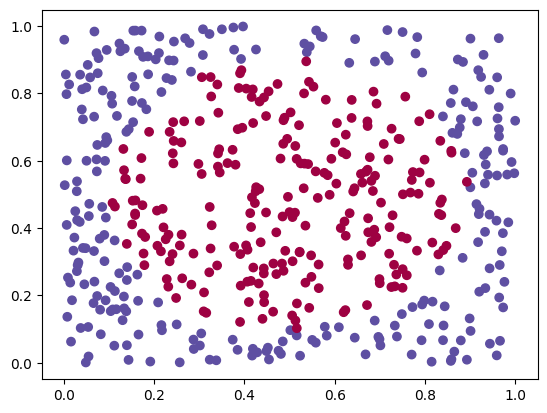

In [3]:
plt.scatter(X[0, :], X[1, :], c=Y[0, :], cmap=plt.cm.Spectral)

In [4]:
lr = 0.01

In [5]:
import torch
import torch.nn.functional as F

In [38]:
X = X.astype(np.float32)
Y = Y.astype(np.float32)

X = torch.from_numpy(X)
Y = torch.from_numpy(Y)

In [44]:
W_1 = torch.randn((100, 2))
b_1 = torch.zeros((100, 1))

W_2 = torch.randn((2, 100))
b_2 = torch.zeros((2, 1))

W_3 = torch.randn((1, 2))
b_3 = torch.zeros((1, 1))

W_1.requires_grad = True
b_1.requires_grad = True
W_2.requires_grad = True
b_2.requires_grad = True
W_3.requires_grad = True
b_3.requires_grad = True

In [46]:
for i in range(10000):
    Z_1 = torch.matmul(W_1, X) + b_1
    A_1 = torch.tanh(Z_1)

    Z_2 = torch.matmul(W_2, A_1) + b_2
    A_2 = torch.tanh(Z_2)

    Z_3 = torch.matmul(W_3, A_2) + b_3
    A_3 = torch.sigmoid(Z_3)

    #Z_4 = torch.matmul(W_4, A_3) + b_4
    #A_4 = torch.sigmoid(Z_4)

    #J = -1/m * torch.sum((torch.multiply(Y, torch.log(A_2)) + torch.multiply(1-Y, torch.log(1 - A_2))))
    J = F.binary_cross_entropy(A_3, Y)

    if(i%1000==0):
        print(J)

    W_1.grad = None
    b_1.grad = None
    W_2.grad = None
    b_2.grad = None
    W_3.grad = None
    b_3.grad = None

    J.backward()

    W_1.data += -lr * W_1.grad
    b_1.data += -lr * b_1.grad
    W_2.data += -lr * W_2.grad
    b_2.data += -lr * b_2.grad
    W_3.data += -lr * W_3.grad
    b_3.data += -lr * b_3.grad
    #W_4.data += -lr * W_4.grad
    #b_4.data += -lr * b_4.grad

tensor(0.1197, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1040, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0924, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0836, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0767, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0711, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0665, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0627, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0594, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0565, grad_fn=<BinaryCrossEntropyBackward0>)


In [47]:
def predict(X):
    #h = 0
    #return h >= 0.5

    Z_1 = torch.matmul(W_1, X) + b_1
    A_1 = torch.tanh(Z_1)

    Z_2 = torch.matmul(W_2, A_1) + b_2
    A_2 = torch.tanh(Z_2)

    Z_3 = torch.matmul(W_3, A_2) + b_3
    A_3 = torch.sigmoid(Z_3)

    #Z_4 = torch.matmul(W_4, A_3) + b_4
    #A_4 = torch.sigmoid(Z_4)

    return A_3 > 0.5

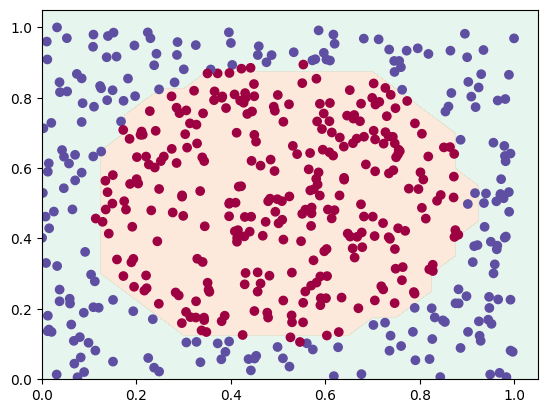

In [48]:
xx, yy = np.meshgrid(np.arange(0, 1.1, 0.05), np.arange(0, 1.1, 0.05))
X_disp = np.c_[xx.ravel(), yy.ravel()]

#h = _sigmoid(w_1*X_disp[:, 0] + w_2*X_disp[:, 1] + b) > 0.5
h = predict(torch.from_numpy(X_disp.T.astype(np.float32)))
h = h.reshape(xx.shape)

plt.contourf(xx, yy, h, cmap=plt.cm.Spectral, alpha=0.2)
plt.scatter(X[0, :], X[1, :], c=Y[0, :], cmap=plt.cm.Spectral)

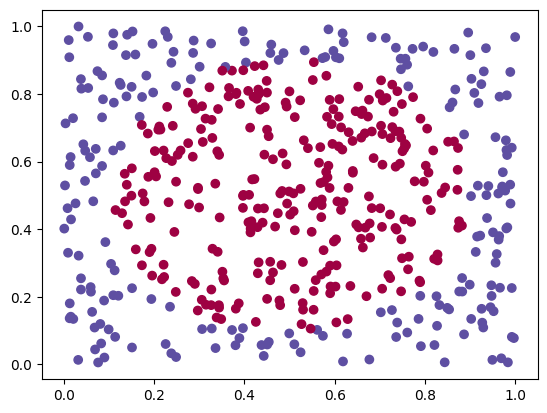

In [49]:
plt.scatter(X[0, :], X[1, :], c=Y_classes[0, :], cmap=plt.cm.Spectral)

In [50]:
Z_1 = torch.matmul(W_1, X) + b_1
A_1 = torch.tanh(Z_1)

Z_2 = torch.matmul(W_2, A_1) + b_2
A_2 = torch.tanh(Z_2)

Z_3 = torch.matmul(W_3, A_2) + b_3
A_3 = torch.softmax(Z_3, axis=0)

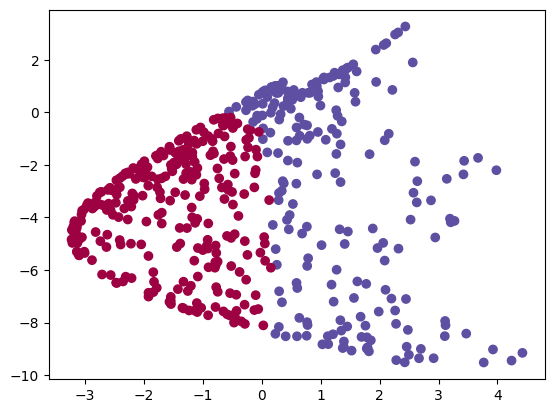

In [54]:
plt.scatter(Z_2[0, :].detach(), Z_2[1, :].detach(), c=Y_classes[0, :], cmap=plt.cm.Spectral)